In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
import json
from tqdm import tqdm, tqdm_notebook
from colour import Color
import imageio

%run ../Scripts/trajectoryVisual.py
foldername = "../Data_Long/mu_power-1_seed0"

In [30]:
with open(foldername + "/params.json") as json_file:
    params = json.load(json_file)
with open(foldername + "/sim_params.json") as json_file:
    sim_params = json.load(json_file)

In [31]:
t0 = 0
tf = sim_params["tf"]
dt = 25
t_domain = np.arange(t0, tf, dt)

In [32]:
for i in t_domain:
    make_frame(foldername, i, save = True)

In [34]:
make_Gif(foldername, t_domain)

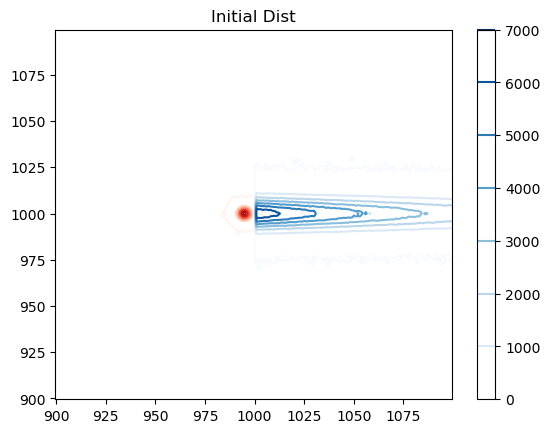

In [6]:
n0 = scipy.sparse.load_npz(foldername+f"sp_frame_n{0}.npz")
nh0 = scipy.sparse.load_npz(foldername+f"sp_frame_nh{0}.npz")

plt.contour(n0.toarray(), cmap = "Reds")
plt.contour(nh0.toarray(), cmap = "Blues")
plt.margins(-0.45, -0.45)
plt.title("Initial Dist")
plt.colorbar()

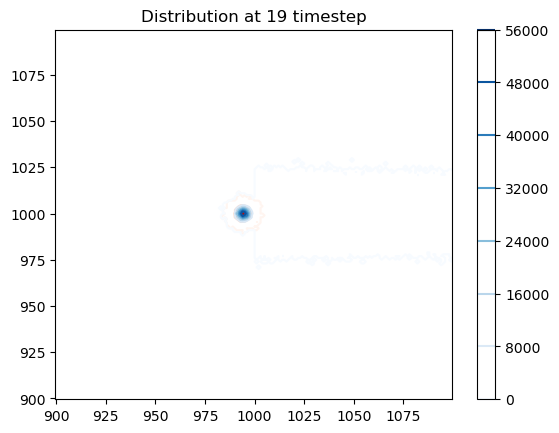

In [89]:
n19 = scipy.sparse.load_npz(foldername+f"sp_frame_n{19}.npz")
nh19 = scipy.sparse.load_npz(foldername+f"sp_frame_nh{19}.npz")

# plt.imshow(n0.toarray())
plt.contour(n19.toarray(), cmap = "Reds")
plt.contour(nh19.toarray(), cmap = "Blues")
plt.margins(-0.45, -0.45)
plt.title("Distribution at 19 timestep")
plt.colorbar()

Text(0.5, 1.0, 'Phage Distribution after 750 timestep')

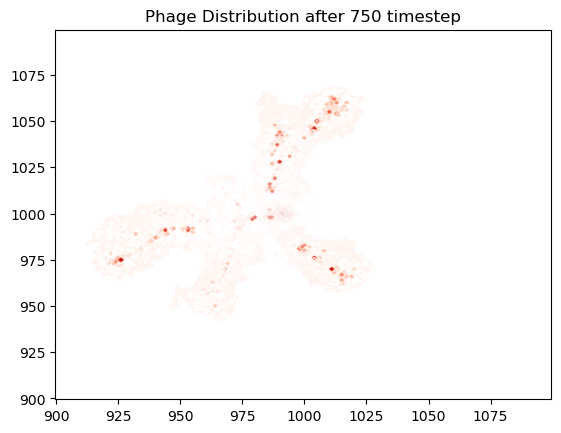

In [62]:
n_i = scipy.sparse.load_npz(foldername+f"sp_frame_n{0}.npz")
mesh2plot = np.zeros_like(n_i.toarray())
itr = range(50, 750, 50)

for i in itr:
    n_i = scipy.sparse.load_npz(foldername+f"sp_frame_n{i}.npz")
    # mesh2plot = n_i.toarray() + mesh2plot*0.9
    plt.contour(n_i.toarray(), cmap = "Reds", alpha = i/750)

# mesh2plot = minmax_norm(mesh2plot)
# plt.imshow(n0.toarray())
# plt.pcolormesh(mesh2plot, cmap = "Reds")
plt.margins(-0.45, -0.45)
plt.title("Phage Distribution after 750 timestep")

Text(0.5, 1.0, 'Spacers Distribution after 750 timesteps')

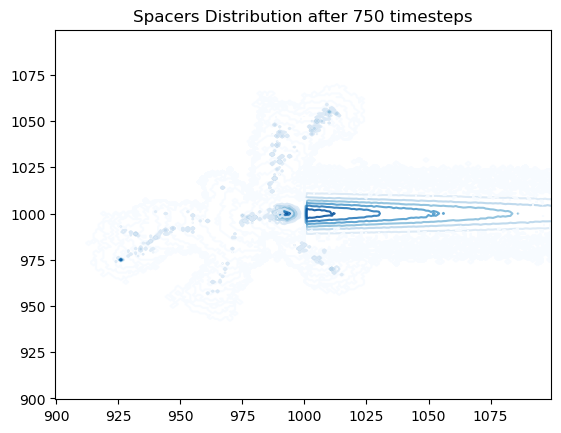

In [20]:
for i in range(1, 750, 50):
    # n_i = scipy.sparse.load_npz(foldername+f"sp_frame_n{i}.npz")
    nh_i = scipy.sparse.load_npz(foldername+f"sp_frame_nh{i}.npz")
    plt.contour(nh_i.toarray(), cmap = "Blues", alpha = 0.9)

# plt.imshow(n0.toarray())
# plt.contour(nh19.toarray(), cmap = "Blues")
plt.margins(-0.45, -0.45)
plt.title("Spacers Distribution after 750 timesteps")

Text(0.5, 1.0, 'N and Nh distribution at 550 timestep')

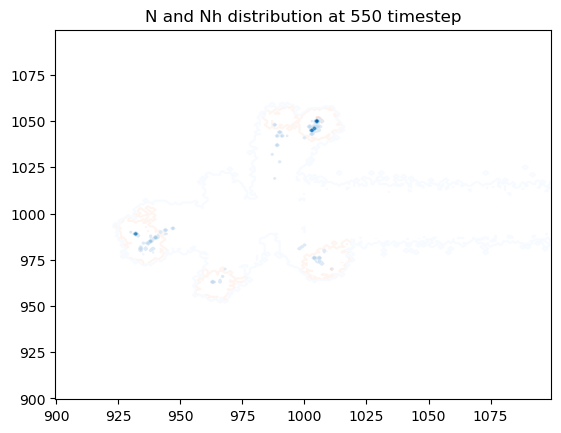

In [66]:
i = 550

n_i = scipy.sparse.load_npz(foldername+f"sp_frame_n{i}.npz")
nh_i = scipy.sparse.load_npz(foldername+f"sp_frame_nh{i}.npz")

plt.contour(n_i.toarray(), cmap = "Reds")
plt.contour(nh_i.toarray(), cmap = "Blues")
plt.margins(-0.45, -0.45)
plt.title(f"N and Nh distribution at {i} timestep")